<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#083069;overflow:hidden"><b>Loan Default Prediction - Data Science Entry Level Test</b></div>

<div style="display:flex;justify-content:center;">
<img src="https://previews.123rf.com/images/turhanyalcin/turhanyalcin1204/turhanyalcin120400004/13323911-stamp-printed-on-the-approved-loan-application-approved.jpg"
style="width:600px;height:600px;" />
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Challenge Objectives</h2>

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡 In this project we will do binary classififcation on Loan Financial Data (Top Coder Challenge)<br>

💡The main aim of this project is use machine learning to create a model that predicts the likelihood of a customer defaulting on a loan using historical financial data.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Importing Libraries</h2>

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("muted")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Loading Datasets</h2>

In [2]:
data_df = pd.read_csv('Financial_data.csv')
data_df.head(10)

,Customer ID,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,1,"$65,000",680,2 years,0.24,0.0
1,2,"$40,000",590,1 year,0.37,1.0
2,3,"$95,000",720,5 years,0.16,0.0
3,4,"$35,000",530,6 months,0.50,1.0
4,5,"$80,000",710,4 years,0.27,0.0
5,6,"$55,000",650,3 years,0.32,0.0
6,7,"$100,000",750,6 years,0.15,0.0
7,8,"$45,000",600,1 year,0.42,1.0
8,9,"$110,000",790,7 years,0.12,0.0
9,10,"$75,000",700,3 years,0.28,0.0


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Data Fields </h2>

> * **Customer ID:** This feature indicates the Id of each customer.
> * **Annual income:** The self-reported annual income provided by the customer during registration. 
> * **Credit score:** This is  a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.
> * **Employment length:** This feature indicates employment length in years and months.
> * **Debt-to-income-ratio:** Asuuming this is a ratio calculated using the customers’s total debt, divided by the customers’s self-reported income.
> * **Loan default:**  binary indicator of whether the customer defaulted. **0 means Not- Defaulted** & **1 means Defaulted**


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Understanding & Cleaning Dataset </h2>

In [3]:
# To check the rows and columns of the dataframe
data_df.shape

(58, 6)

In [4]:
# To check data type and information of each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           58 non-null     int64  
 1   Annual income         57 non-null     object 
 2   Credit score          58 non-null     int64  
 3   Employment length     57 non-null     object 
 4   Debt-to-income ratio  57 non-null     float64
 5   Loan default          57 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           58 non-null     int64  
 1   Annual income         57 non-null     object 
 2   Credit score          58 non-null     int64  
 3   Employment length     57 non-null     object 
 4   Debt-to-income ratio  57 non-null     float64
 5   Loan default          57 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


In [6]:
# Descriptive statistical analysis of numerical features on the dataset
data_df.describe()

,Customer ID,Credit score,Debt-to-income ratio,Loan default
count,58.000000,58.000000,57.000000,57.000000
mean,29.500000,674.310345,0.296667,0.298246
std,16.886879,80.461652,0.116792,0.461555
min,1.000000,520.000000,0.110000,0.000000
25%,15.250000,610.000000,0.200000,0.000000
50%,29.500000,695.000000,0.280000,0.000000
75%,43.750000,730.000000,0.380000,1.000000
max,58.000000,800.000000,0.520000,1.000000


In [7]:
# To check for unique values in each column
data_df.nunique()

Customer ID             58
Annual income           23
Credit score            25
Employment length        8
Debt-to-income ratio    31
Loan default             2
dtype: int64

In [8]:
# Checks for duplicates in the dataset
data_df.duplicated().sum()

0

In [9]:
# To check for null values in the data from each of the columns
# Representing the missing values in percentage to have a clearer picture of the missing data
for column in data_df.columns:
    percent = data_df[column].isnull().mean()
    print(f'{column}:{round(percent*100, 2)}%')

Customer ID:0.0%
Annual income:1.72%
Credit score:0.0%
Employment length:1.72%
Debt-to-income ratio:1.72%
Loan default:1.72%


In [10]:
# Describe a function to remove null values and drop the customer ID column
def clean (data):
    #dropping unwanted columns
    data.drop(columns=["Customer ID"], inplace = True)

    #filling missing values in Age column
    data['Annual income'].fillna(data['Annual income'].mode()[0], inplace = True)
    
    #filling missing values in Employment length column
    data['Employment length'].fillna(data['Employment length'].mode()[0], inplace = True)

     #filling missing values in Debt-to-income column
    data['Debt-to-income ratio'].fillna(data['Debt-to-income ratio'].median(), inplace = True)
    
    #filling missing values in Loan default column
    data['Loan default'].fillna(data['Loan default'].median(), inplace = True)
    
    #asserting that there is no missing values left
    for col in data:
        assert data[col].isnull().sum() == 0
    
    return data

In [11]:
data_df = clean(data_df)
data_df.isnull().sum()

Annual income           0
Credit score            0
Employment length       0
Debt-to-income ratio    0
Loan default            0
dtype: int64

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Exploratory Data Analysis  </h2>

##### Visualizing Target Variable -Loan Default

In [12]:
# Visualizing Target Variable -Loan Default
data_df["Loan default"].replace({0:"Not-Defaulted",1:"Defaulted"},inplace=True)
Pie = data_df["Loan default"].value_counts().to_frame()
Pie

,Loan default
Not-Defaulted,41
Defaulted,17


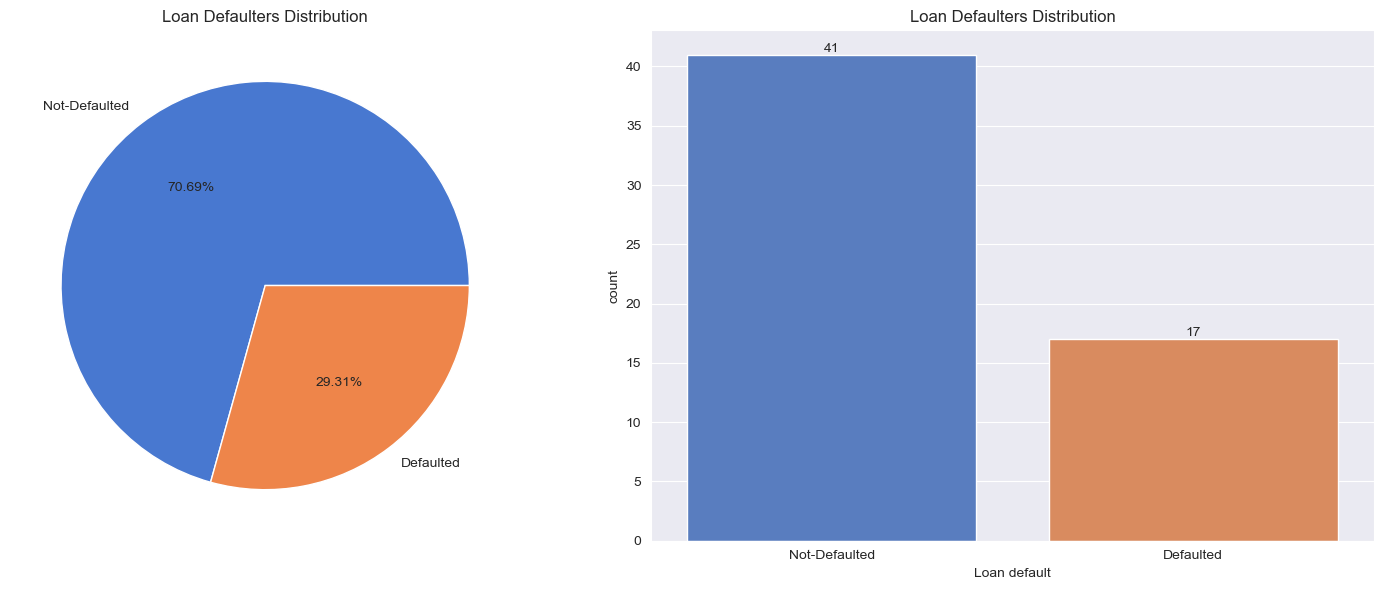

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")
plt.title("Loan Defaulters Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="Loan default",data=data_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Defaulters Distribution")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The number of customers who did not default on their loan respresent more than 70% of the data.<br>
</div>

##### Visualizing Feature Variable - Annual Income

In [14]:
# The Annual income column datatype states object, would like to change to integer
# using replace to slice each string entry by removing the '$' and ',' in Annual income column
data_df['Annual income'] = data_df['Annual income'].replace('[\$,]', '', regex=True).astype(int)

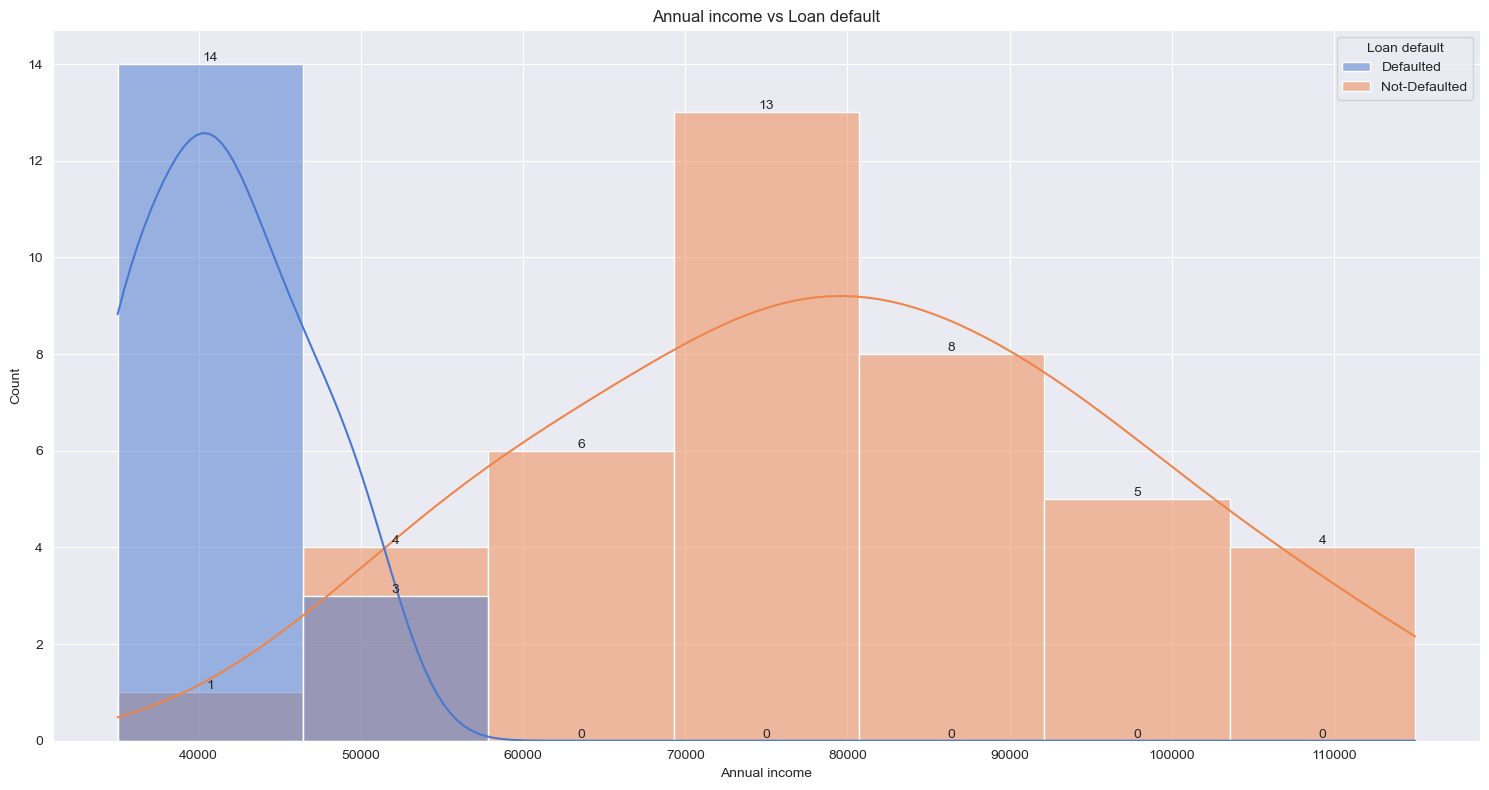

In [15]:
# Visualizing Feature Variable - Annual Income

plt.figure(figsize=(15,8))
ax = sns.histplot(x='Annual income', hue="Loan default", data=data_df.sort_values(by=['Annual income'],ascending=True), kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Annual income vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The customers with Annual Income greater than $60,000, were less likely to default their Loans.<br>

💡We can observe that a number of customers earned less than $45,000 Annually.<br>
</div>

##### Visualizing Feature Variable -Credit Score

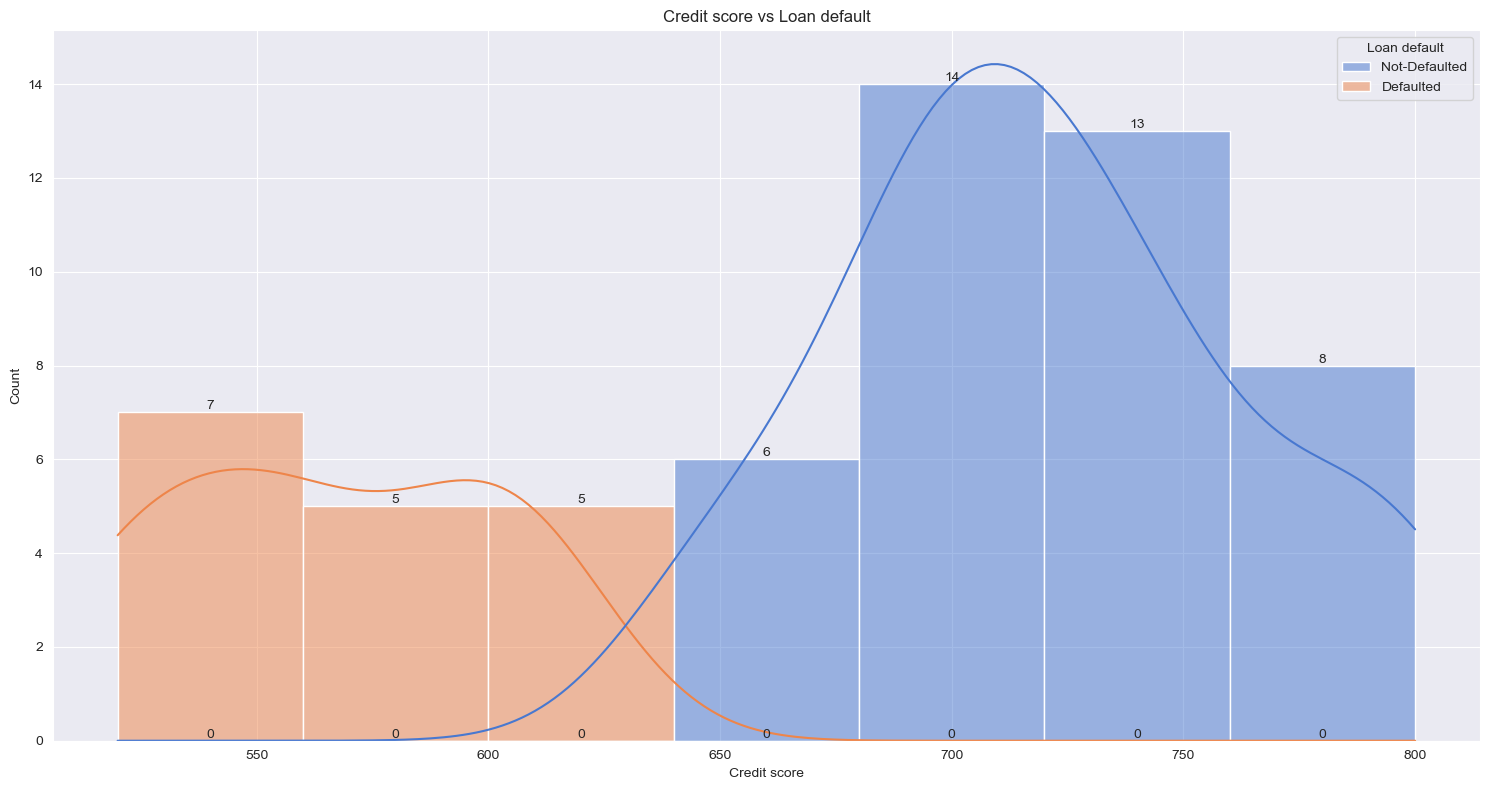

In [16]:
# Visualizing Feature Variable -Credit Score
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Credit score", hue="Loan default", data=data_df, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Credit score vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The customers with Credit Score greater than 650 tend to not default on their loans.<br>
</div>

##### Visualizing Feature Variable - Employment Length

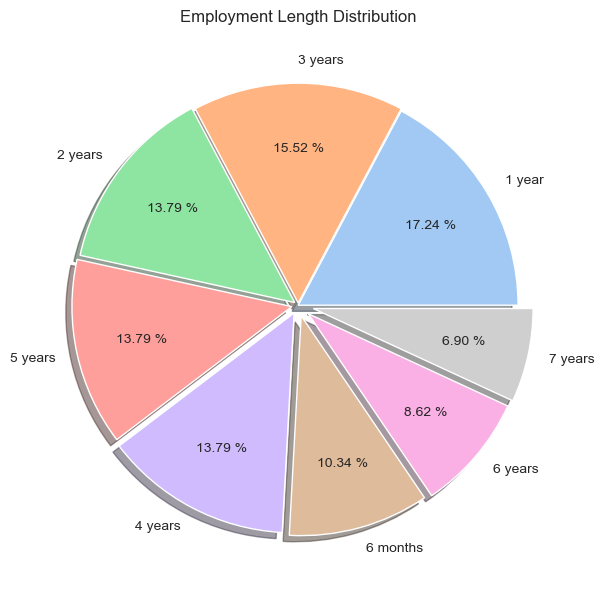

In [17]:
# Visualizing Feature Variable - Employment Length
Pie = data_df["Employment length"].value_counts().to_frame()
Pie
colors = sns.color_palette('pastel')

plt.figure(figsize=(15,6))
explode_list = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
plt.pie(Pie.values.ravel(),labels=Pie.index, autopct='%1.2f %%', explode=explode_list, pctdistance=.7, colors=colors, shadow=True)
plt.title("Employment Length Distribution")
plt.tight_layout()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Most of the customers have an employment length of 1year.<br>

💡Fewer customers have more than 7 years of employment length.<br>

💡There are equal numbers f=of customers with 2 years, 4 years and 5 years of employment length.<br>
</div>

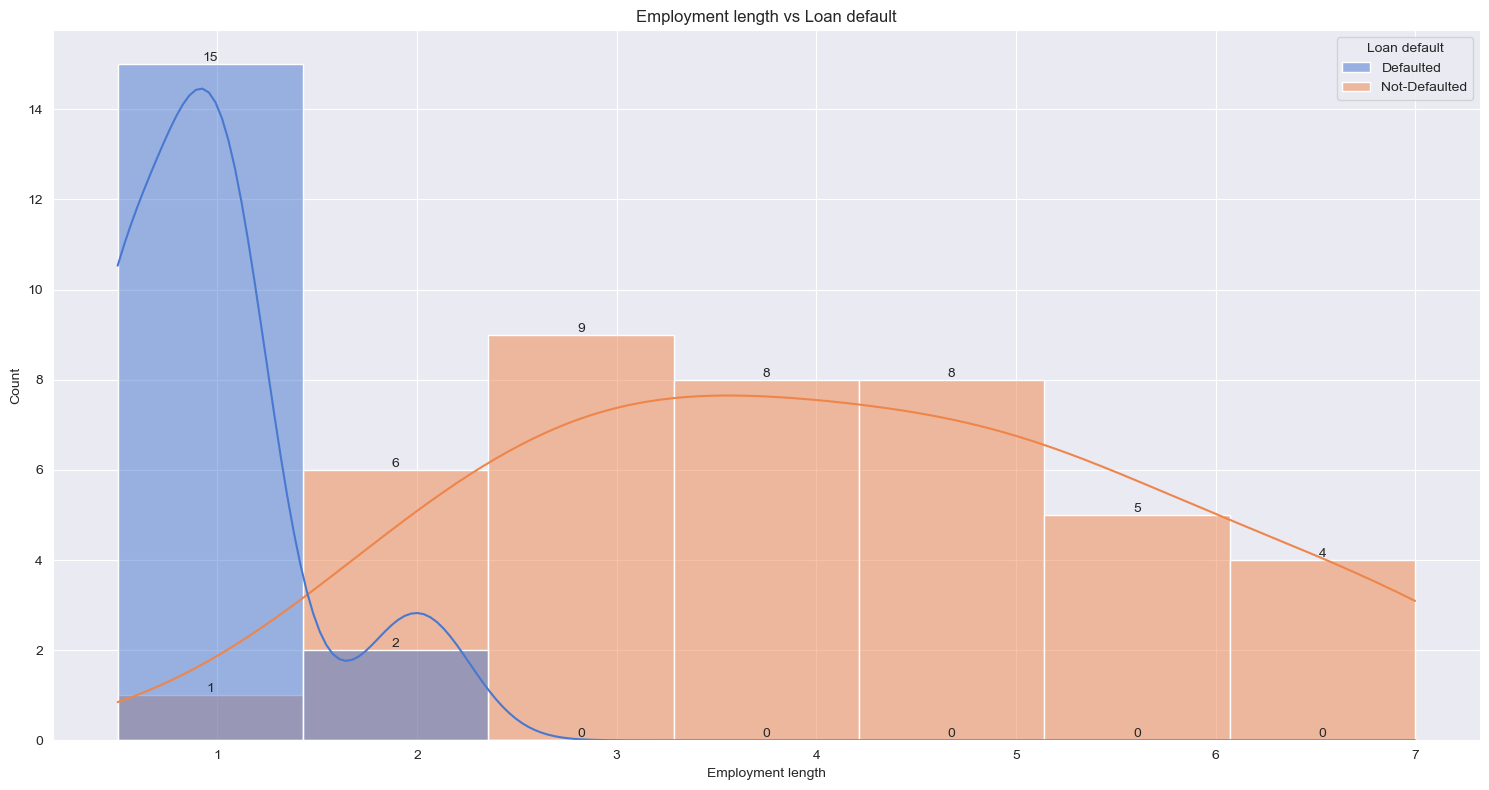

In [18]:
# The Employment length column datatype states object, would like to change to integer
# using replace to slice each string entry by removing the 'Year','Years and 'Months' in Employment length column

data_df['Employment length'] = data_df['Employment length'].replace(['6 months'],'0.5 years')
data_df['Employment length'] = data_df['Employment length'].replace('[years,year]', '', regex=True).astype(float)

plt.figure(figsize=(15,8))
ax = sns.histplot(x="Employment length", hue="Loan default", data=data_df.sort_values(by=['Employment length'],ascending=True), kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Employment length vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Customers with less than 2 years of employment lenght were most likely to default on their loans.<br>

💡All the customers with 6 months of employment defaulted on their loan.<br>

💡We can observe that a lot of the customers had an employment length less than or equal to 1 year.<br>
</div>

##### Visualizing Feature Variable - Debt-to-income ratio

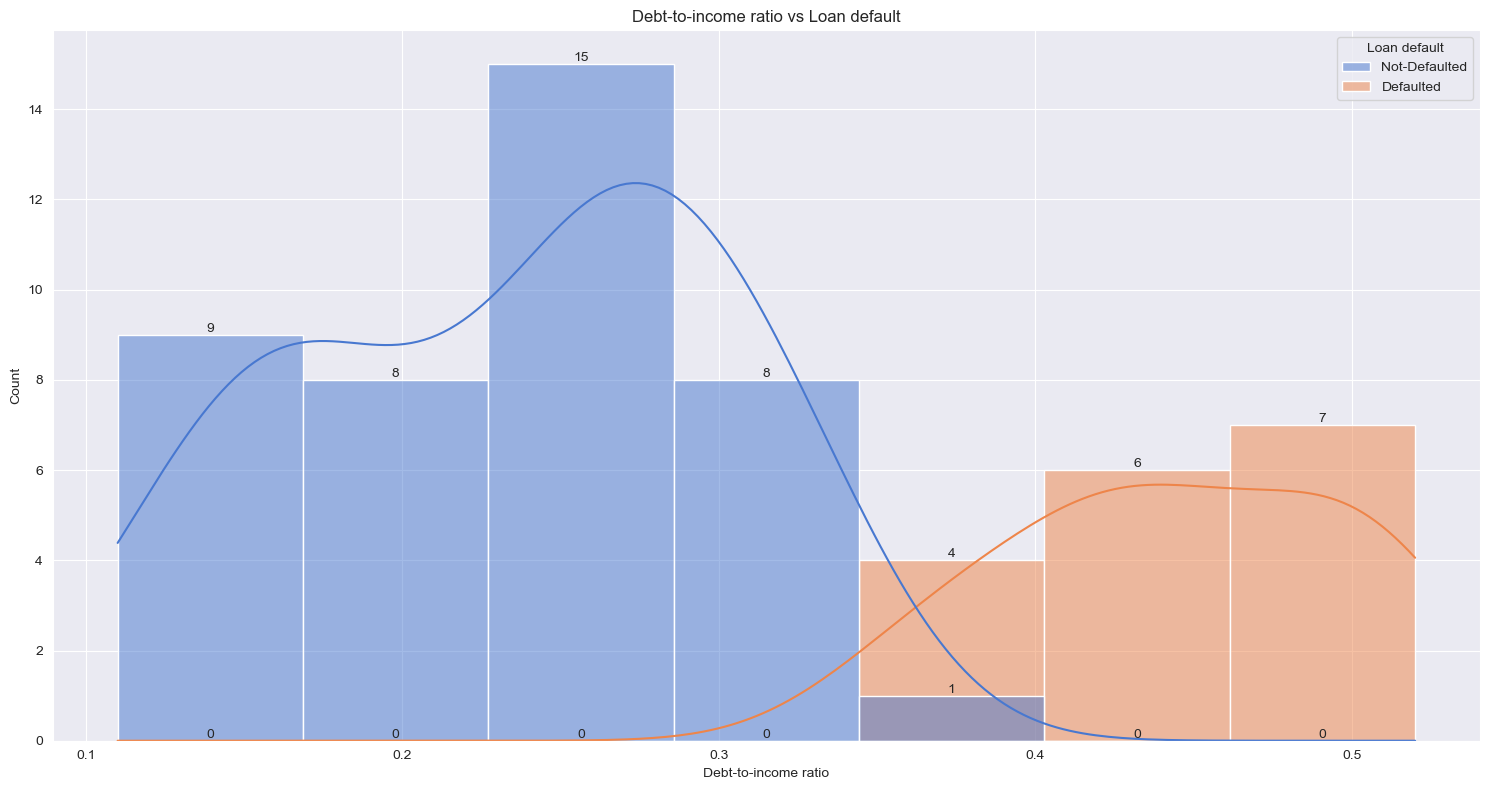

In [19]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Debt-to-income ratio", hue="Loan default", data=data_df, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Debt-to-income ratio vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Customers with Debt-To-income ratio greater than 0.35 were most likely to default on their loan.<br>
</div>

##### Plotting Boxplots and Satterplots to gain more insights on the dataset

In [20]:
categorical_features = data_df.select_dtypes(include=["object"]).columns.tolist()
#categorical_features.remove("Loan default")
numeric_features = data_df.select_dtypes(include=["int","float"]).columns.tolist()

print("Categorical Features:",categorical_features)
print("\n","-"*50)
print("\nNumerical Features:",numeric_features)

Categorical Features: ['Loan default']

 --------------------------------------------------

Numerical Features: ['Annual income', 'Credit score', 'Employment length', 'Debt-to-income ratio']


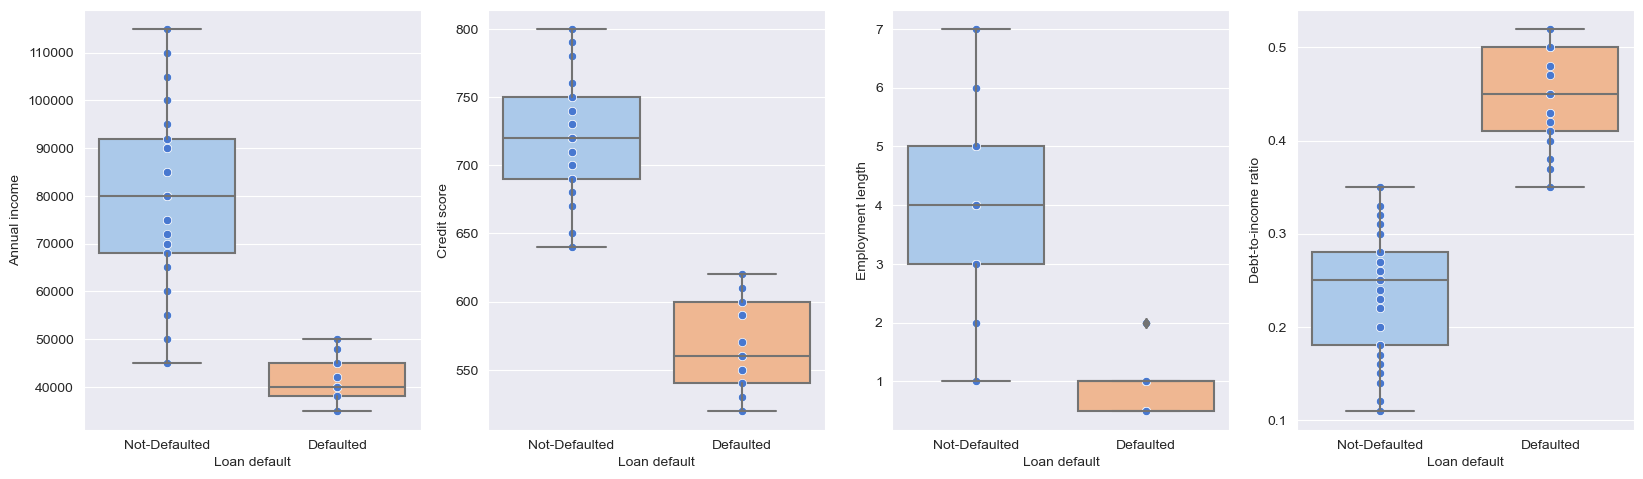

In [21]:
fig = plt.figure(figsize = (20,12))
fig.tight_layout()

for i in range(len(numeric_features)):
  column = numeric_features[i]
  sub = fig.add_subplot(2, 4, i + 1)
  sns.boxplot(x = 'Loan default', y = column, data =data_df, palette = 'pastel')
  sns.scatterplot(x = 'Loan default', y = column, data = data_df, palette = 'muted')
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The Dataset is unbalanced.<br>
</div>

##### Multivariate Analysis


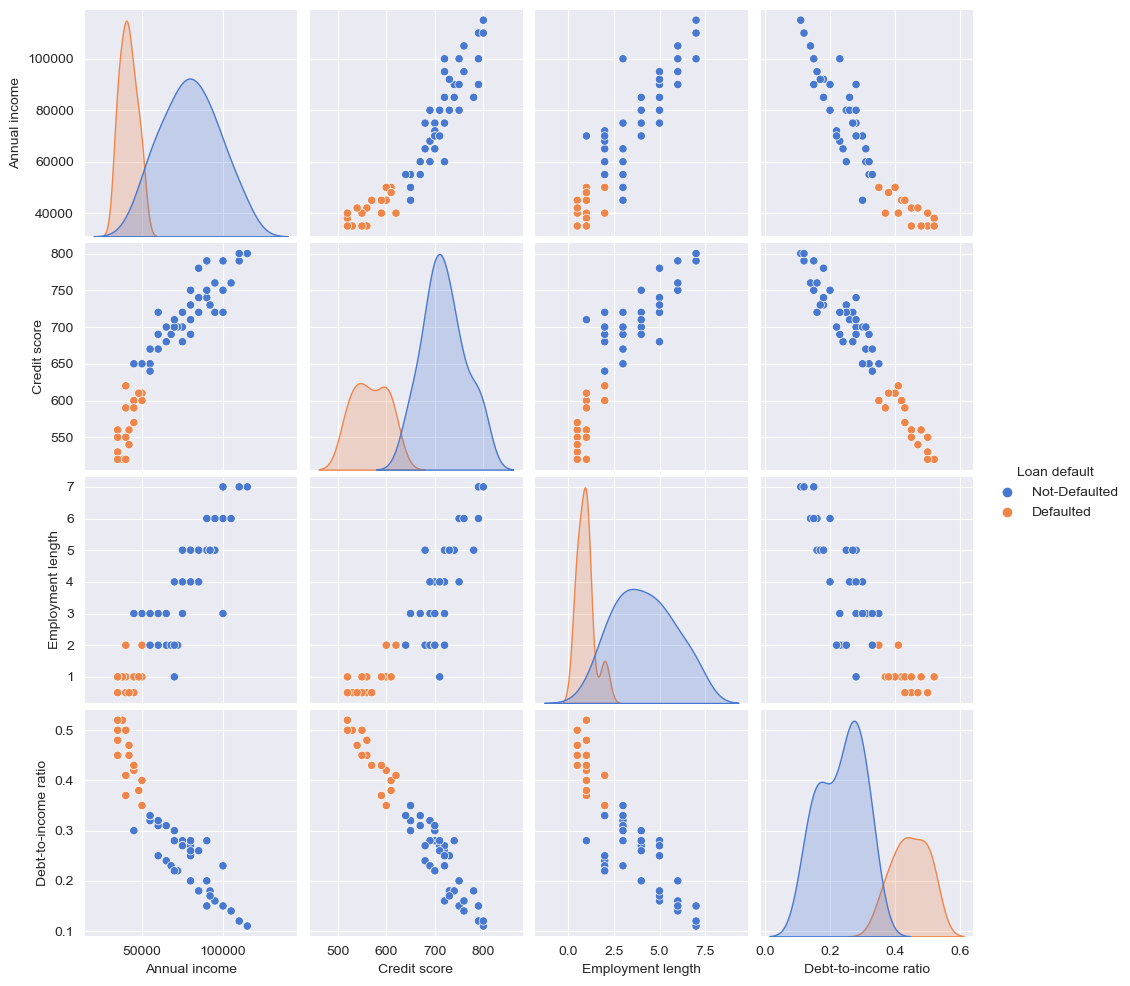

In [22]:
sns.pairplot(data_df,hue="Loan default")
plt.show()

* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

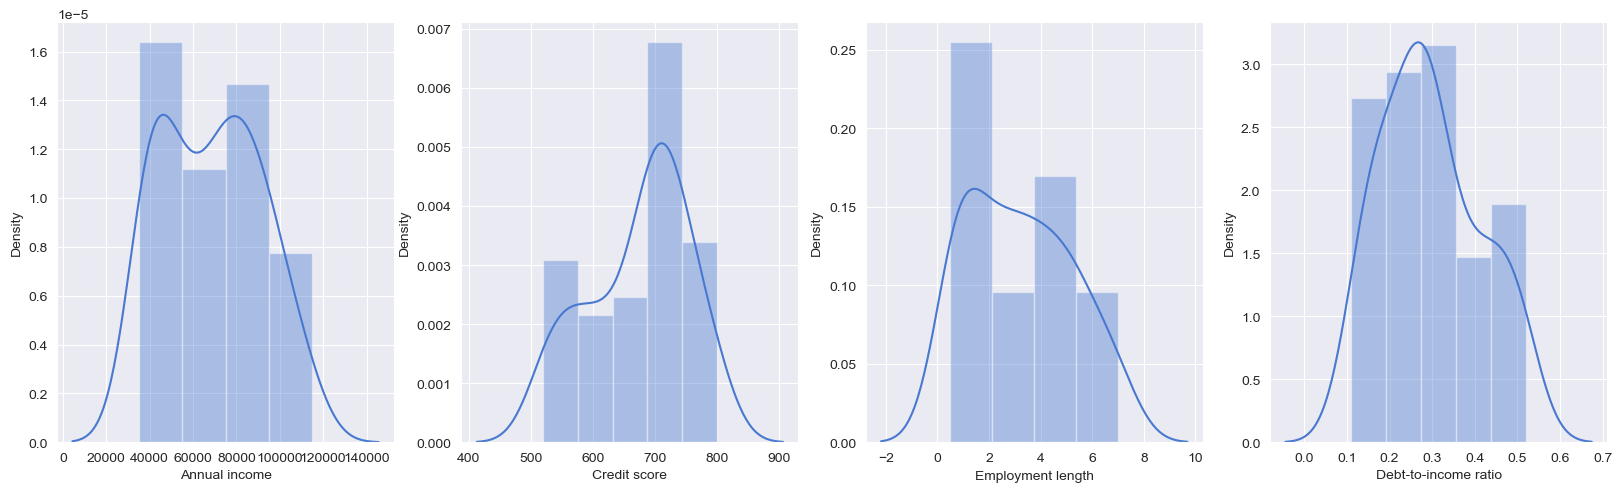

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.distplot(data_df["Annual income"])

plt.subplot(2,4,2)
sns.distplot(data_df["Credit score"])

plt.subplot(2,4,3)
sns.distplot(data_df["Employment length"])

plt.subplot(2,4,4)
sns.distplot(data_df["Debt-to-income ratio"])

fig.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡We can observe that the features have kind of Normal Distribution but are highly unbalanced.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Plotting Correlation Matrix HeatMap </h2>

In [24]:
data_df["Loan default"] = data_df["Loan default"].replace({"Defaulted":1,"Not-Defaulted":0})


Text(0.5, 1.0, 'Correlation Matrix Heat Map')

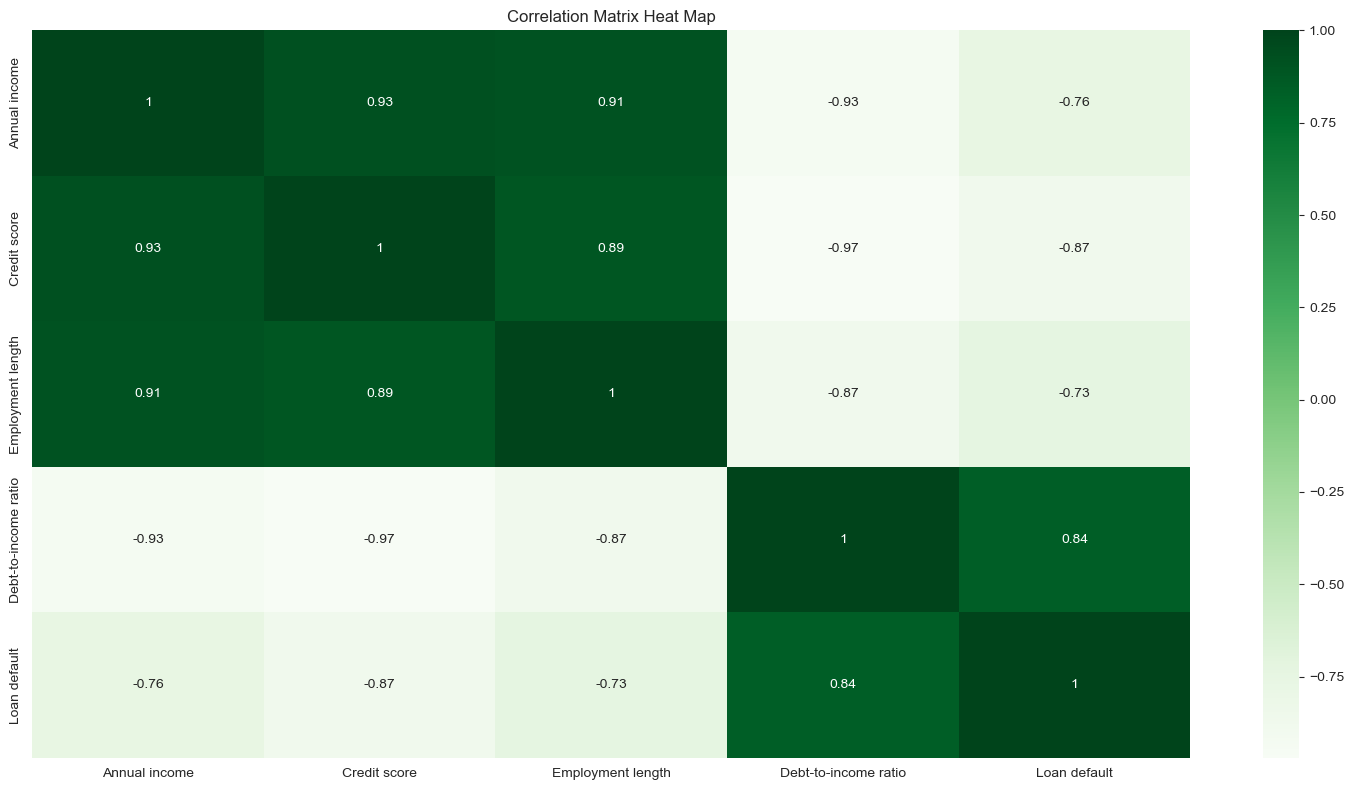

In [25]:
#Plotting the Correlation Matrix Heat Map to check for Multicolinearity i.e Identifying collinearity between features

plt.figure(figsize=(15, 8), tight_layout=True)
ax = sns.heatmap(data_df.corr().round(2), annot=True, cmap='Greens') 
ax.set_title('Correlation Matrix Heat Map')

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡We can observe that the colors get darker as collinearity increases.<br>

💡There is a strong positive correlation between Annual Income and Credit Score, Annual Income and Employment Length, Credit Score and Employment Length, Loan Default and Debt-to Income ratio.<br> 

💡This means when one increases, the other is highly likely to increase.<br>

💡We can also observe that the higher the Debt-to-income ratio, the higher the customer is to default on their Loan.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Selecting Features & Label for Training the Model </h2>

In [26]:
X = data_df.drop(columns=["Loan default"])
Y = data_df["Loan default"]

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Splitting the Dataset for Unsacled Data </h2>

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3,stratify=Y)

In [28]:
print(x_train.shape, y_train.shape)

(40, 4) (40,)


In [29]:
print(x_test.shape,y_test.shape)

(18, 4) (18,)


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Balancing the Dataset for Unscaled Data</h2>

#### Since we're dealing with class imbalance, we must use SMOTE, which is an oversampling technique that will generate synthetic samples of the minority class to balance the class distribution.

In [30]:
# Checking class distribution before SMOTE
y_train.value_counts()

0    28
1    12
Name: Loan default, dtype: int64

In [31]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [32]:
# Checking class distribution after SMOTE
y_resampled.value_counts()

0    28
1    28
Name: Loan default, dtype: int64

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Modelling Unscaled Data</h2>

#### Model Function for Unscaled Data

In [33]:
Accuracy_score = []
Recall_score = []
Precision_score = []
F1_score = []
Auc_Roc_score = []
Accuracy_score_train = []
Auc_Roc_score_train = []


def my_model(model):
    model.fit(x_resampled,y_resampled)
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy_Train: {accuracy_train*100:.2f}%')
    print(f'Accuracy Test: {accuracy*100:.2f}%')
    recall_train = recall_score(y_train, y_train_pred)
    recall = recall_score(y_test,y_pred)
    print(f'Recall: {recall*100:.2f}%')
    precision = precision_score(y_test,y_pred)
    print(f'Precision: {precision*100:.2f}%')
    f1 = f1_score(y_test,y_pred)
    print(f'F1 Score: {f1*100:.2f}%')
    auc_roc_train = roc_auc_score(y_train,y_train_pred)
    auc_roc = roc_auc_score(y_test,y_pred)
    print(f'AUC-ROC Train Score: {auc_roc_train*100:.2f}%')
    print(f'AUC-ROC Test Score: {auc_roc*100:.2f}%')
    Accuracy_score.append(accuracy*100)
    Recall_score.append(recall*100)
    Precision_score.append(precision*100)
    F1_score.append(f1*100)
    Auc_Roc_score.append(auc_roc*100)
    Accuracy_score_train.append(accuracy_train*100)
    Auc_Roc_score_train.append(auc_roc_train*100)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['True (Did not default)', 'True (Defaulted)'], 
                         columns=['Predicted (Did not default)', 'Predicted (Defaulted)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 15})

    return model

Accuracy_Train: 100.00%
Accuracy Test: 83.33%
Recall: 100.00%
Precision: 62.50%
F1 Score: 76.92%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 88.46%


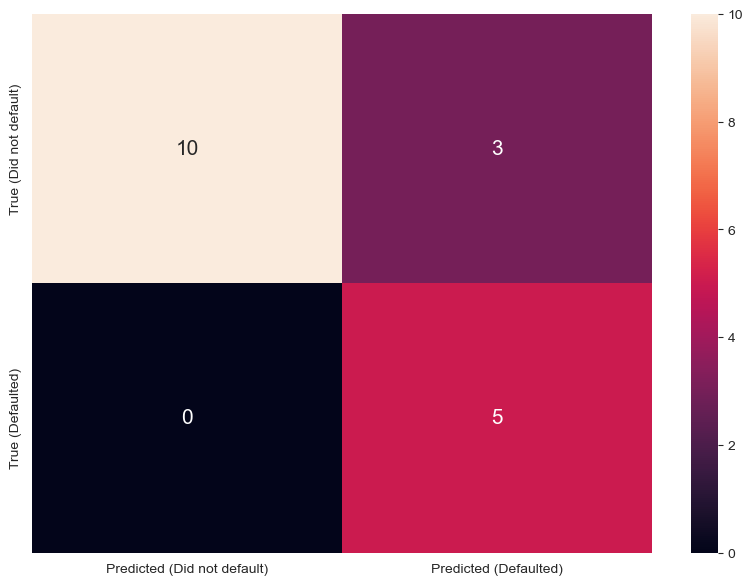

In [34]:
LOG_MODEL = my_model(LogisticRegression())


Accuracy_Train: 100.00%
Accuracy Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 92.31%


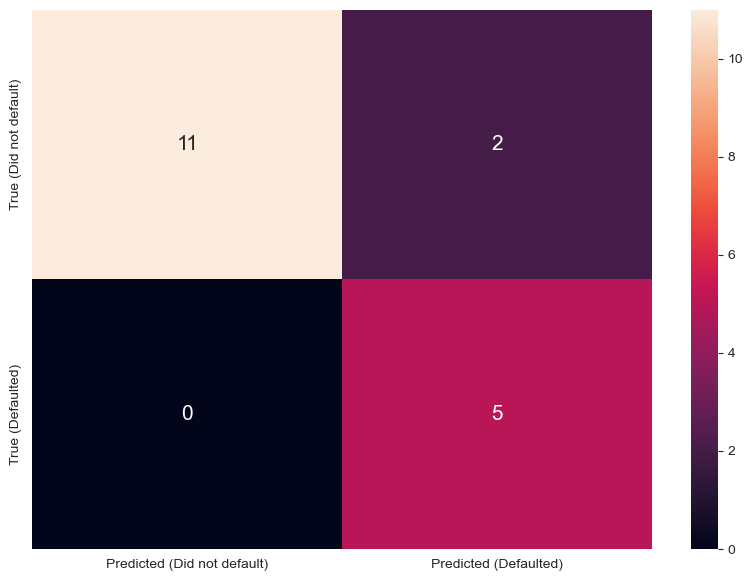

In [35]:
DTC_MODEL = my_model(DecisionTreeClassifier())


Accuracy_Train: 100.00%
Accuracy Test: 94.44%
Recall: 100.00%
Precision: 83.33%
F1 Score: 90.91%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 96.15%


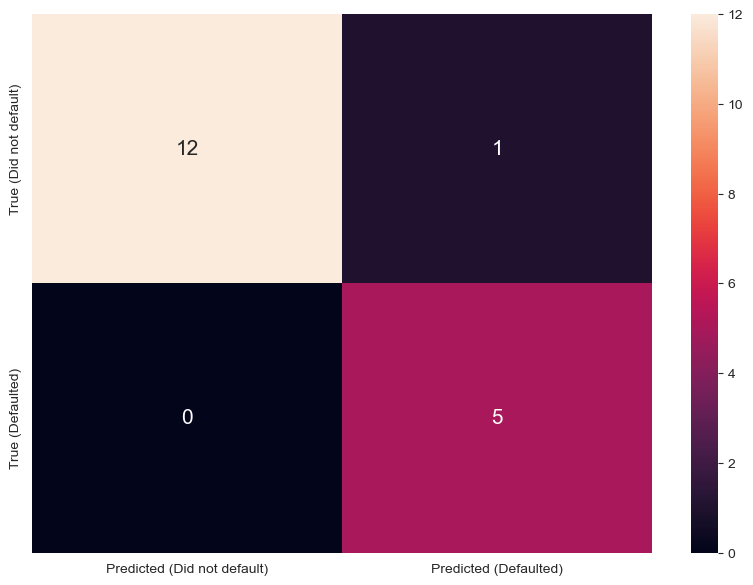

In [36]:
RFC_MODEL = my_model(RandomForestClassifier())


Accuracy_Train: 100.00%
Accuracy Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 92.31%


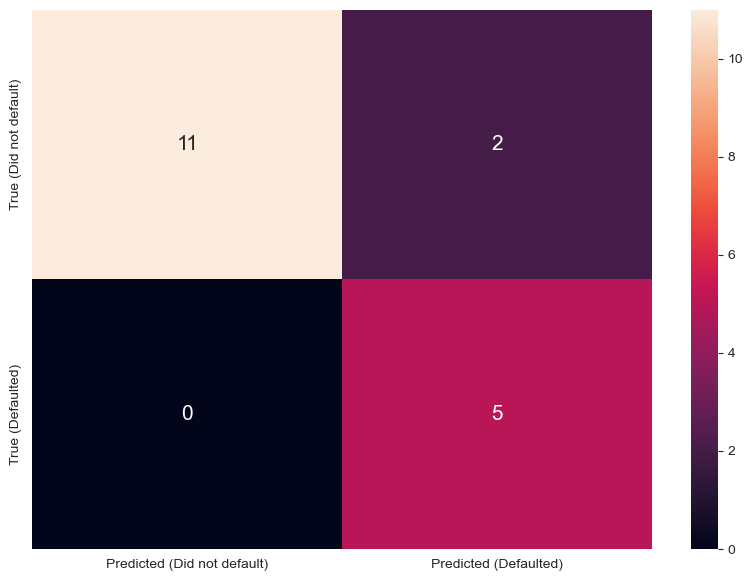

In [37]:
ABC_MODEL = my_model(AdaBoostClassifier())


Accuracy_Train: 100.00%
Accuracy Test: 94.44%
Recall: 100.00%
Precision: 83.33%
F1 Score: 90.91%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 96.15%


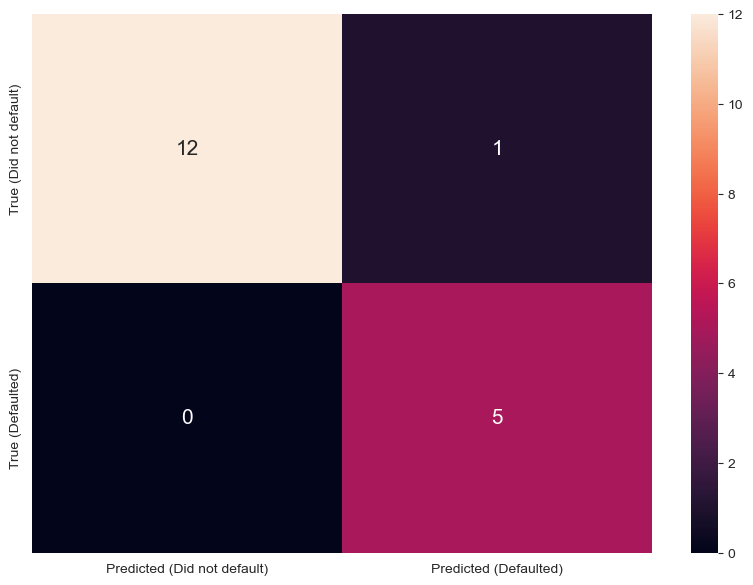

In [38]:
GBC_MODEL = my_model(GradientBoostingClassifier())


Accuracy_Train: 100.00%
Accuracy Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 92.31%


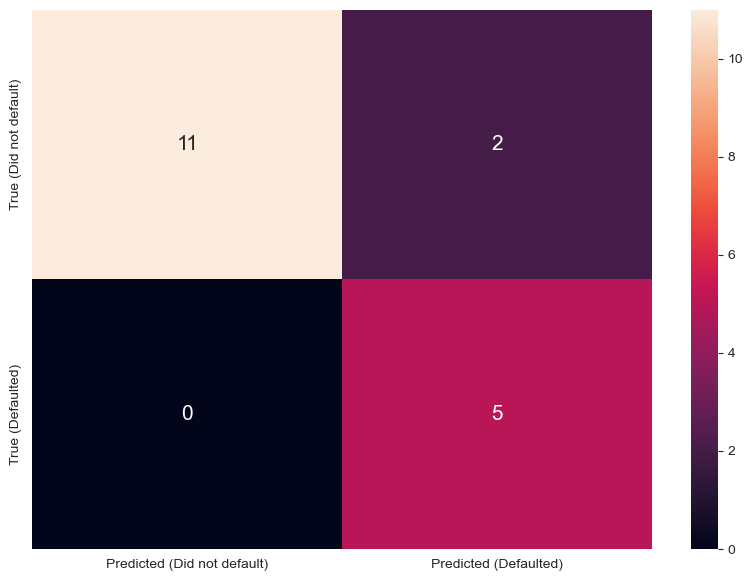

In [39]:
XGBC_MODEL = my_model(XGBClassifier())


Accuracy_Train: 100.00%
Accuracy Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Test Score: 92.31%


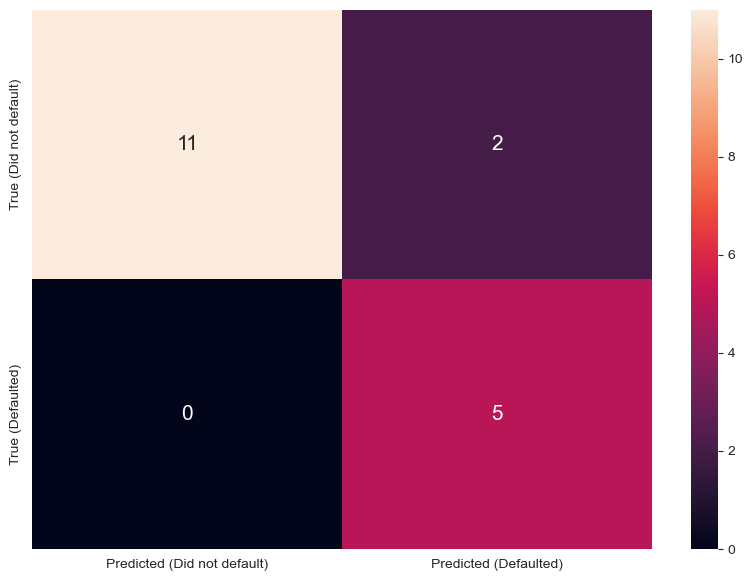

In [40]:
LGBM_MODEL = my_model(LGBMClassifier())


Learning rate set to 0.003009
0:	learn: 0.6883047	total: 121ms	remaining: 2m
1:	learn: 0.6831429	total: 124ms	remaining: 1m 1s
2:	learn: 0.6777164	total: 126ms	remaining: 41.9s
3:	learn: 0.6730422	total: 129ms	remaining: 32.2s
4:	learn: 0.6683982	total: 133ms	remaining: 26.4s
5:	learn: 0.6643978	total: 136ms	remaining: 22.5s
6:	learn: 0.6600889	total: 139ms	remaining: 19.7s
7:	learn: 0.6560023	total: 141ms	remaining: 17.5s
8:	learn: 0.6522255	total: 145ms	remaining: 15.9s
9:	learn: 0.6471622	total: 148ms	remaining: 14.6s
10:	learn: 0.6426073	total: 151ms	remaining: 13.6s
11:	learn: 0.6385149	total: 154ms	remaining: 12.7s
12:	learn: 0.6343566	total: 157ms	remaining: 12s
13:	learn: 0.6302445	total: 162ms	remaining: 11.4s
14:	learn: 0.6256713	total: 166ms	remaining: 10.9s
15:	learn: 0.6213133	total: 170ms	remaining: 10.4s
16:	learn: 0.6174284	total: 173ms	remaining: 10s
17:	learn: 0.6130721	total: 179ms	remaining: 9.75s
18:	learn: 0.6094648	total: 182ms	remaining: 9.42s
19:	learn: 0.60529

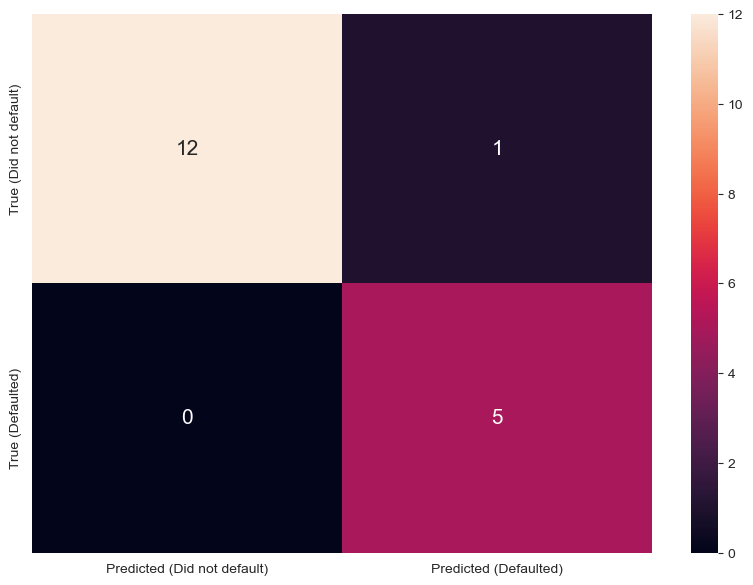

In [41]:
CBC_MODEL = my_model(CatBoostClassifier())

In [42]:
models = ["Logistic Regression","Decision Tree", "Random Forest", "Ada Boost",
          "Gradient Boost",  "XGBoost", "LGBM", "CatBoost"]

performance_df = pd.DataFrame({"Algorithms":models,
                   "Accuracy Score":Accuracy_score,
                   "Recall Score":Recall_score,
                   "Precision Score":Precision_score,
                   "F1 Score":F1_score,
                   "AUC-ROC Score":Auc_Roc_score,
                   "Accuracy Score Training":Accuracy_score_train,
                   "AUC-ROC Score Training":Auc_Roc_score_train})

performance_df

,Algorithms,Accuracy Score,Recall Score,Precision Score,F1 Score,AUC-ROC Score,Accuracy Score Training,AUC-ROC Score Training
0,Logistic Regression,83.333333,100.0,62.500000,76.923077,88.461538,100.0,100.0
1,Decision Tree,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
2,Random Forest,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0
3,Ada Boost,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
4,Gradient Boost,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0
5,XGBoost,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
6,LGBM,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
7,CatBoost,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0


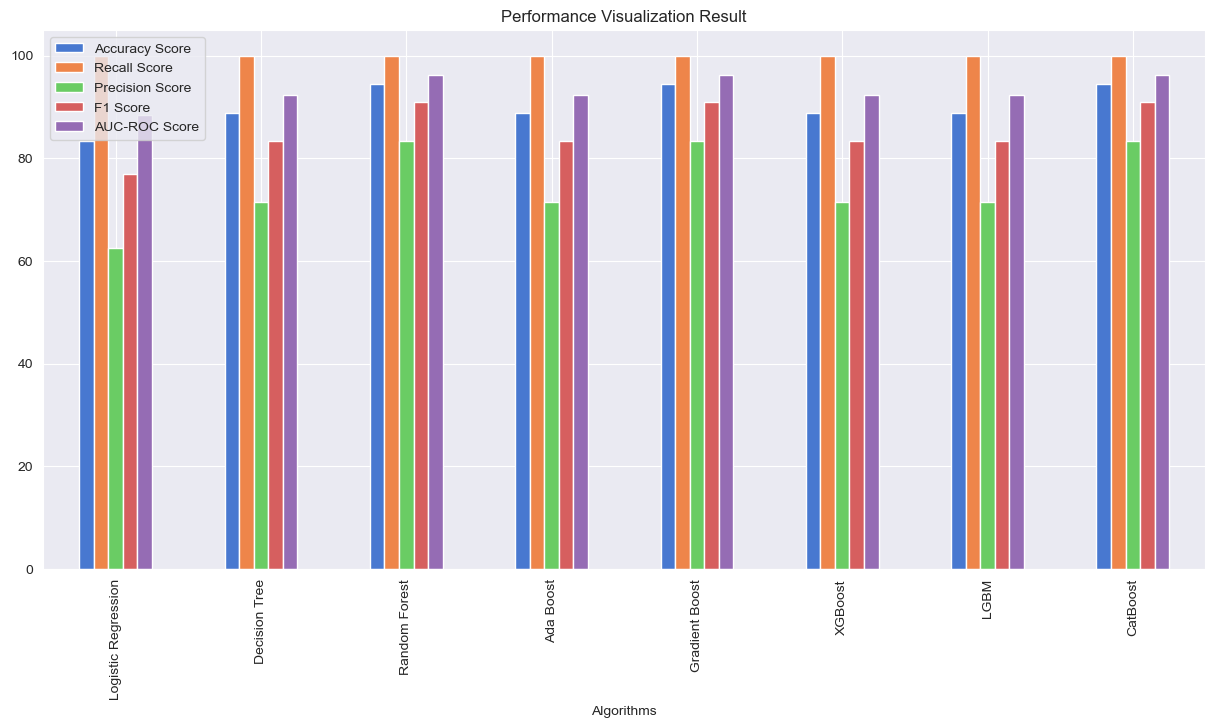

In [43]:
performance_df.plot(x="Algorithms",y=["Accuracy Score","Recall Score", "Precision Score", "F1 Score", "AUC-ROC Score"], figsize=(15,7),kind="bar",
        title="Performance Visualization Result",)
plt.show()

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Scaling the Dataset</h2>

In [44]:
ss=StandardScaler()
X_scaled = ss.fit_transform(X)


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Splitting the Dataset for scaled Data</h2>

In [45]:
# Splitting the scaled data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,Y,random_state=0,test_size=0.3,stratify=Y)
print(x_train1.shape, y_train1.shape)

(40, 4) (40,)


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Balancing the Dataset for scaled Data</h2>

In [46]:
# Checking class distribution before SMOTE
y_train1.value_counts()

0    28
1    12
Name: Loan default, dtype: int64

In [47]:
smote = SMOTE()
x_resampled1, y_resampled1 = smote.fit_resample(x_train1, y_train1)

In [48]:
# Checking class distribution after SMOTE
y_resampled1.value_counts()

0    28
1    28
Name: Loan default, dtype: int64

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Modelling scaled Data</h2>

#### Model Function for Scaled Data

In [49]:
Accuracy_score1 = []
Recall_score1 = []
Precision_score1 = []
F1_score1 = []
Auc_Roc_score1 = []
Accuracy_score_train1 = []
Auc_Roc_score_train1 = []

def my_model1(model):
    model.fit(x_resampled1,y_resampled1)
    y_train_pred1 = model.predict(x_train1)
    y_pred1 = model.predict(x_test1)
    accuracy_train1 = accuracy_score(y_train1, y_train_pred1)
    accuracy1 = accuracy_score(y_test1, y_pred1)
    print(f'Accuracy_Train: {accuracy_train1*100:.2f}%')
    print(f'Accuracy_Test: {accuracy1*100:.2f}%')
    recall1 = recall_score(y_test1,y_pred1)
    print(f'Recall: {recall1*100:.2f}%')
    precision1 = precision_score(y_test1,y_pred1)
    print(f'Precision: {precision1*100:.2f}%')
    f11 = f1_score(y_test1,y_pred1)
    print(f'F1 Score: {f11*100:.2f}%')
    auc_roc_train1 = roc_auc_score(y_train1,y_train_pred1)
    auc_roc1 = roc_auc_score(y_test1,y_pred1)
    print(f'AUC-ROC Train Score: {auc_roc_train1*100:.2f}%')
    print(f'AUC-ROC Score: {auc_roc1*100:.2f}%')
    Accuracy_score1.append(accuracy1*100)
    Recall_score1.append(recall1*100)
    Precision_score1.append(precision1*100)
    F1_score1.append(f11*100)
    Auc_Roc_score1.append(auc_roc1*100)
    Accuracy_score_train1.append(accuracy_train1*100)
    Auc_Roc_score_train1.append(auc_roc_train1*100)
    cm1 = confusion_matrix(y_test1, y_pred1)
    df_cm1 = pd.DataFrame(cm1, index=['True (Did not default)', 'True (Defaulted)'], 
                         columns=['Predicted (Did not default)', 'Predicted (Defaulted)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm1, annot=True,fmt='d', annot_kws={"size": 15})

    return model

Accuracy_Train: 100.00%
Accuracy_Test: 100.00%
Recall: 100.00%
Precision: 100.00%
F1 Score: 100.00%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 100.00%


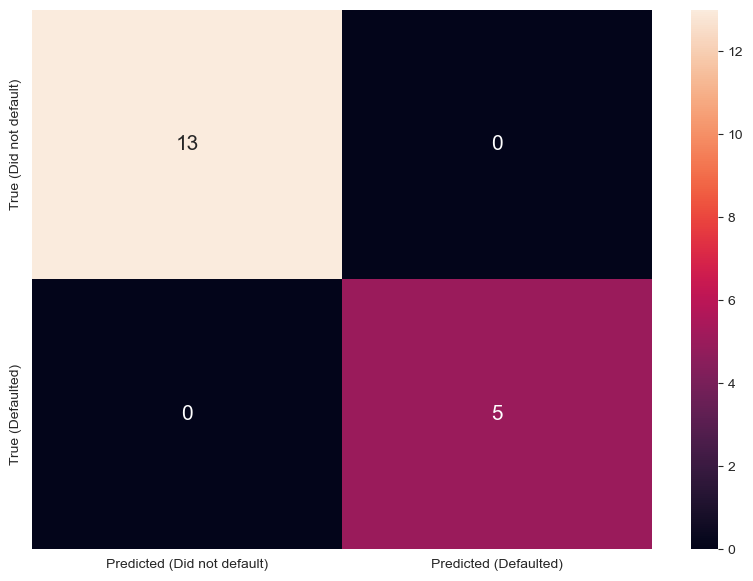

In [50]:
LOG_MODEL1 = my_model1(LogisticRegression())

Accuracy_Train: 100.00%
Accuracy_Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 92.31%


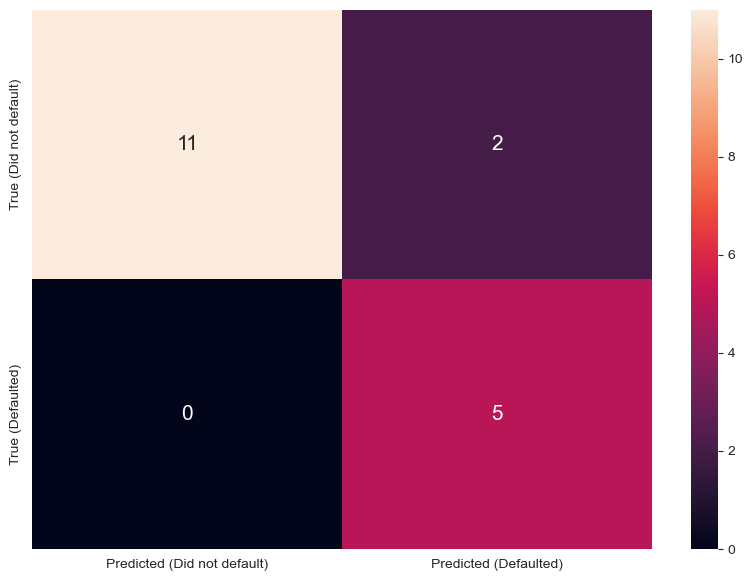

In [51]:
DTC_MODEL1 = my_model1(DecisionTreeClassifier())

Accuracy_Train: 100.00%
Accuracy_Test: 94.44%
Recall: 100.00%
Precision: 83.33%
F1 Score: 90.91%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 96.15%


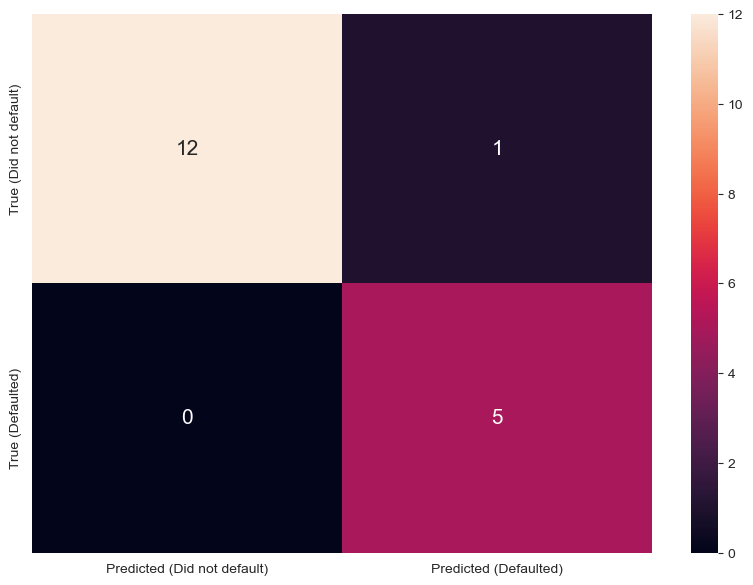

In [52]:
RFC_MODEL1 = my_model1(RandomForestClassifier())


Accuracy_Train: 100.00%
Accuracy_Test: 100.00%
Recall: 100.00%
Precision: 100.00%
F1 Score: 100.00%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 100.00%


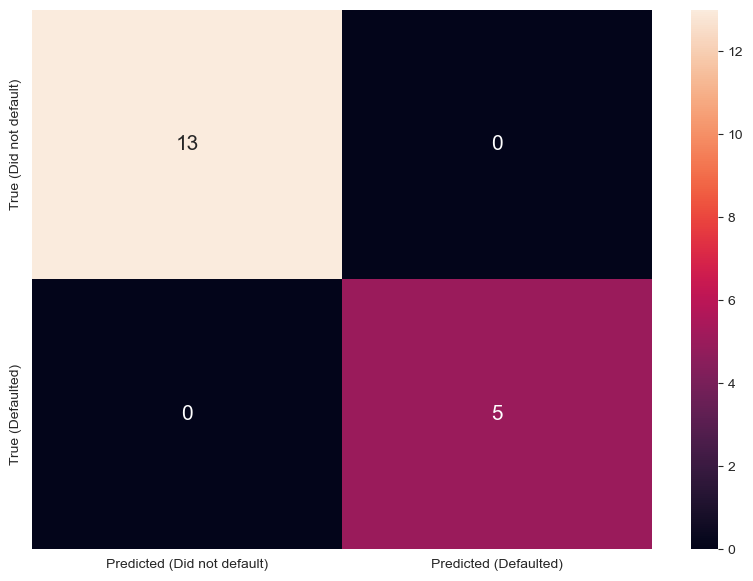

In [53]:
ABC_MODEL1 = my_model1(AdaBoostClassifier())

Accuracy_Train: 100.00%
Accuracy_Test: 94.44%
Recall: 100.00%
Precision: 83.33%
F1 Score: 90.91%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 96.15%


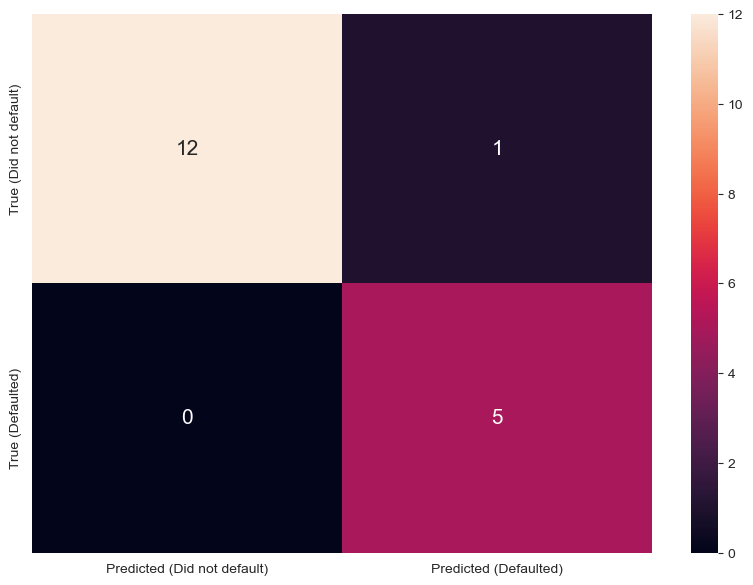

In [54]:
GBC_MODEL1 = my_model1(GradientBoostingClassifier())

Accuracy_Train: 100.00%
Accuracy_Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 92.31%


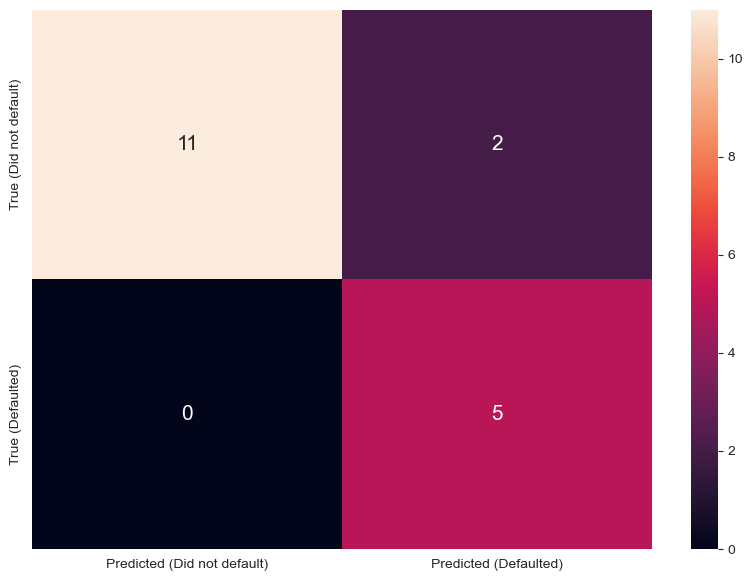

In [55]:
XGBC_MODEL1 = my_model1(XGBClassifier())


Accuracy_Train: 100.00%
Accuracy_Test: 88.89%
Recall: 100.00%
Precision: 71.43%
F1 Score: 83.33%
AUC-ROC Train Score: 100.00%
AUC-ROC Score: 92.31%


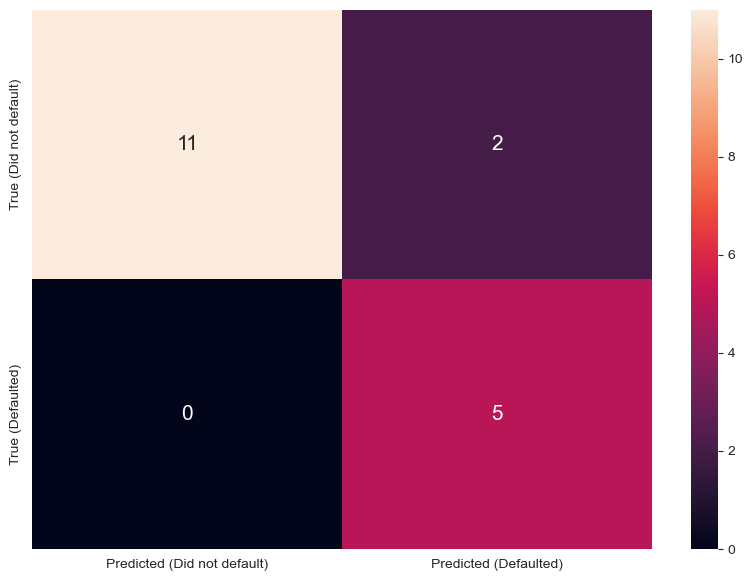

In [56]:
LGBM_MODEL1 = my_model1(LGBMClassifier())


Learning rate set to 0.003009
0:	learn: 0.6889456	total: 5.99ms	remaining: 5.98s
1:	learn: 0.6840375	total: 9.87ms	remaining: 4.92s
2:	learn: 0.6791116	total: 12.9ms	remaining: 4.3s
3:	learn: 0.6753783	total: 16.7ms	remaining: 4.15s
4:	learn: 0.6707241	total: 19.8ms	remaining: 3.94s
5:	learn: 0.6656919	total: 23.3ms	remaining: 3.86s
6:	learn: 0.6608505	total: 26.1ms	remaining: 3.7s
7:	learn: 0.6571598	total: 29.2ms	remaining: 3.62s
8:	learn: 0.6518417	total: 31.8ms	remaining: 3.5s
9:	learn: 0.6472029	total: 34.6ms	remaining: 3.42s
10:	learn: 0.6426892	total: 38.3ms	remaining: 3.44s
11:	learn: 0.6383863	total: 40.9ms	remaining: 3.37s
12:	learn: 0.6340249	total: 44.1ms	remaining: 3.35s
13:	learn: 0.6295700	total: 46.7ms	remaining: 3.29s
14:	learn: 0.6252188	total: 49.8ms	remaining: 3.27s
15:	learn: 0.6211077	total: 52.7ms	remaining: 3.24s
16:	learn: 0.6165444	total: 55.7ms	remaining: 3.22s
17:	learn: 0.6127909	total: 58.9ms	remaining: 3.21s
18:	learn: 0.6084499	total: 61.9ms	remaining: 3

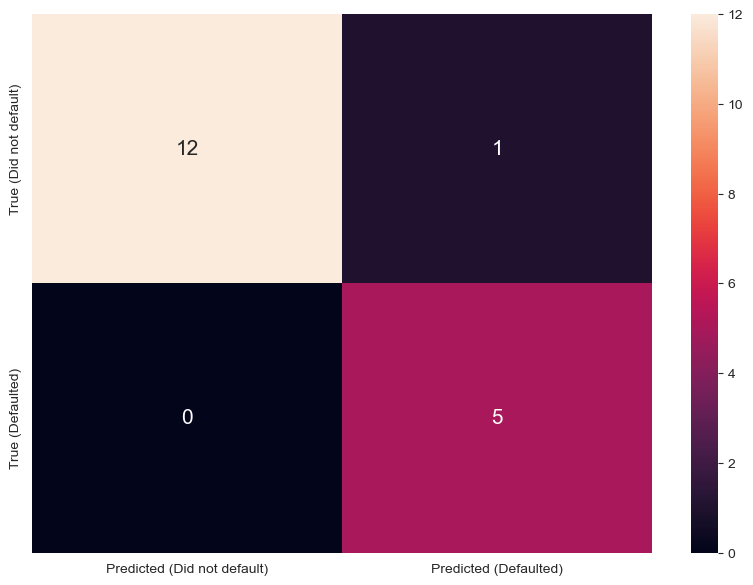

In [57]:
CBC_MODEL1 = my_model1(CatBoostClassifier())

In [58]:
models1 = ["Logistic Regression","Decision Tree", "Random Forest", "Ada Boost",
          "Gradient Boost",  "XGBoost", "LGBM", "CatBoost"]

performance_df1 = pd.DataFrame({"Algorithms":models1,
                   "Accuracy Score":Accuracy_score1,
                   "Recall Score":Recall_score1,
                   "Precision Score":Precision_score1,
                   "F1 Score":F1_score1,
                   "AUC-ROC Score":Auc_Roc_score1,
                   "Accuracy Score Training":Accuracy_score_train1,
                   "AUC-ROC Score Training":Auc_Roc_score_train1})

performance_df1

,Algorithms,Accuracy Score,Recall Score,Precision Score,F1 Score,AUC-ROC Score,Accuracy Score Training,AUC-ROC Score Training
0,Logistic Regression,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
1,Decision Tree,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
2,Random Forest,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0
3,Ada Boost,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
4,Gradient Boost,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0
5,XGBoost,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
6,LGBM,88.888889,100.0,71.428571,83.333333,92.307692,100.0,100.0
7,CatBoost,94.444444,100.0,83.333333,90.909091,96.153846,100.0,100.0


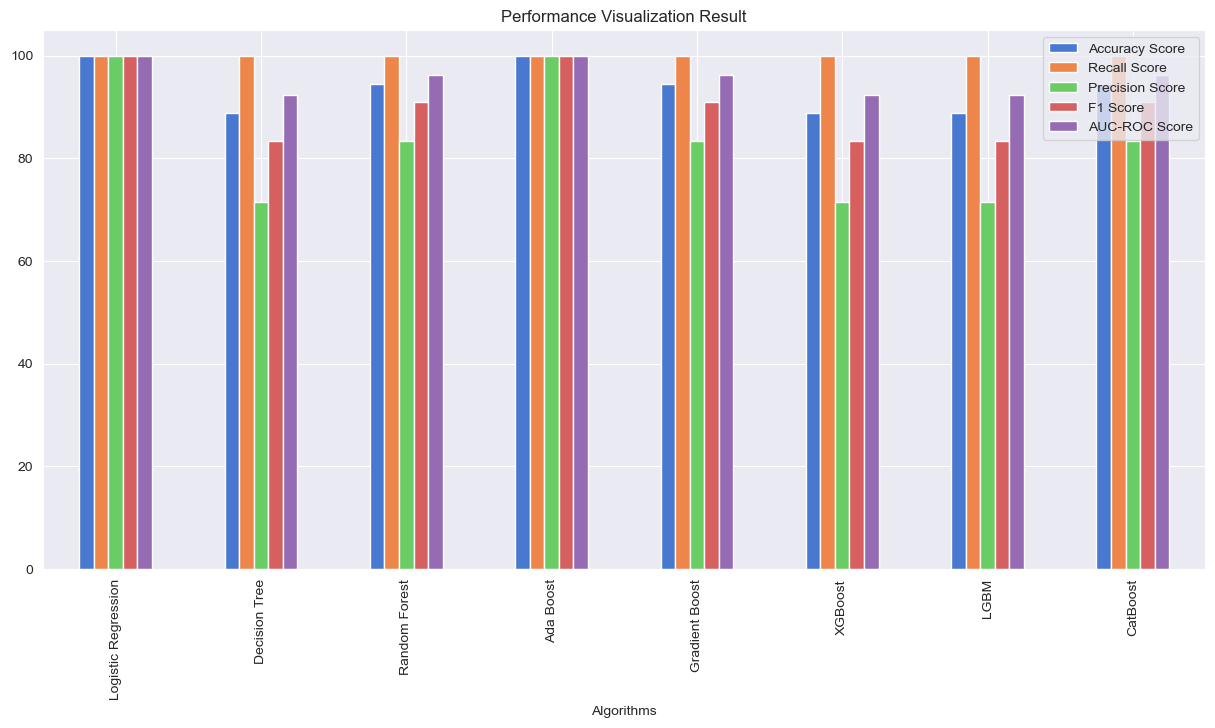

In [59]:
performance_df1.plot(x="Algorithms",y=["Accuracy Score","Recall Score", "Precision Score", "F1 Score", "AUC-ROC Score"], figsize=(15,7),kind="bar",
        title="Performance Visualization Result",)
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡We can observe that scaling the dataset had the most effect on the Logistic Regression Model and Ada Boost Classifier Model by improving the Models performance.<br>

💡All the other Models looks to have little to no improvements<br>

</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Best Performing Models</h2>

- Logistic Regression Model (Best Performer)

- Random Forest Classifier Model

- Ada Boost Classifier Model

- LGB Model

- CatBoost Model

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Combining some of the Classifier Models for a Stacked Model</h2>

Learning rate set to 0.002606
0:	learn: 0.6891377	total: 3.36ms	remaining: 3.36s
1:	learn: 0.6851204	total: 6.55ms	remaining: 3.27s
2:	learn: 0.6810121	total: 9.07ms	remaining: 3.01s
3:	learn: 0.6771787	total: 11.9ms	remaining: 2.96s
4:	learn: 0.6736705	total: 15.1ms	remaining: 3s
5:	learn: 0.6698937	total: 18.1ms	remaining: 3s
6:	learn: 0.6667214	total: 21.9ms	remaining: 3.1s
7:	learn: 0.6629529	total: 25ms	remaining: 3.1s
8:	learn: 0.6584221	total: 28.4ms	remaining: 3.13s
9:	learn: 0.6548546	total: 31.6ms	remaining: 3.13s
10:	learn: 0.6505696	total: 35.4ms	remaining: 3.18s
11:	learn: 0.6470020	total: 38.5ms	remaining: 3.17s
12:	learn: 0.6439370	total: 42.2ms	remaining: 3.2s
13:	learn: 0.6402137	total: 44.7ms	remaining: 3.15s
14:	learn: 0.6373325	total: 47.2ms	remaining: 3.1s
15:	learn: 0.6339580	total: 50.7ms	remaining: 3.12s
16:	learn: 0.6301949	total: 53.4ms	remaining: 3.08s
17:	learn: 0.6266315	total: 56.1ms	remaining: 3.06s
18:	learn: 0.6234134	total: 60.7ms	remaining: 3.13s
19:	

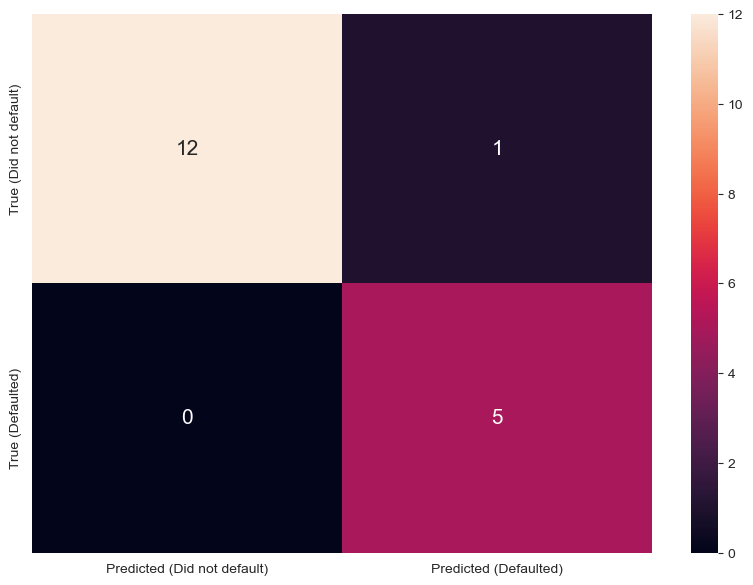

In [60]:
STKD_MODEL = StackingClassifier(estimators=[('GBoost', GBC_MODEL1),
                                                ('RFC', RFC_MODEL1),
                                                ('ADABoost', ABC_MODEL1),
                                                ("LGBM", LGBM_MODEL1),
                                                (" CTBoost", CBC_MODEL1 )])

STKD_MODEL.fit(x_train, y_train)

y_train_pred = STKD_MODEL.predict(x_train)

y_test_pred = STKD_MODEL.predict(x_test)


cm_stckd = confusion_matrix(y_test, y_test_pred)
df_cm_stckd = pd.DataFrame(cm_stckd, index=['True (Did not default)', 'True (Defaulted)'], 
                         columns=['Predicted (Did not default)', 'Predicted (Defaulted)'])
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(df_cm_stckd, annot=True,fmt='d', annot_kws={"size": 15})


In [61]:

print("Stacking Model Accuracy Score on Training Data is:",accuracy_score(y_train,y_train_pred)*100)
print("Stacking Model Accuracy Score on Testing Data is:",accuracy_score(y_test,y_test_pred)*100)

print("Stacking Model AUC-ROC Score on Training Data is:",roc_auc_score(y_train,y_train_pred)*100)
print("Stacking Model AUC-ROC Score on Testing Data is:",roc_auc_score(y_test,y_test_pred)*100)

print("Stacking Model Precision Score on Training Data is:",precision_score(y_train,y_train_pred)*100)
print("Stacking Model Precision Score on Testing Data is:",precision_score(y_test,y_test_pred)*100)

Stacking Model Accuracy Score on Training Data is: 100.0
Stacking Model Accuracy Score on Testing Data is: 94.44444444444444
Stacking Model AUC-ROC Score on Training Data is: 100.0
Stacking Model AUC-ROC Score on Testing Data is: 96.15384615384616
Stacking Model Precision Score on Training Data is: 100.0
Stacking Model Precision Score on Testing Data is: 83.33333333333334


In [62]:
import joblib

#Save the model as a pickle file
filename = './loan_prediction_stkd.pkl'
joblib.dump(STKD_MODEL, filename)

['./loan_prediction_stkd.pkl']

In [63]:
import joblib

#Save the model as a pickle file
filename = './loan_prediction_logreg.pkl'
joblib.dump(LOG_MODEL1, filename)

['./loan_prediction_logreg.pkl']